intro 

F1

plots -> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',50)
pd.options.display.max_rows

60

In [3]:
initFile = pd.read_csv('listings.csv',index_col= 'id',low_memory=False)
initFile.head(1)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,https://www.airbnb.com/rooms/109,20190708161040,2019-07-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,NaN,NaN,NaN,NaN,Camelot NEW RESIDENTS’ GENERAL INFORMATION F...,NaN,NaN,https://a0.muscache.com/im/pictures/4321499/1d...,NaN,521,https://www.airbnb.com/users/show/521,Paolo,2008-06-27,"San Francisco, California, United States",Search for me on the Internet with the keyword...,NaN,...,2019-07-09,2,0,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,NaN,"{""Culver City"","" CA""}",f,f,strict_14_with_grace_period,t,f,1,1,0,0,0.02


In [4]:
lst = ['listing_url','scrape_id','last_scraped','summary',\
       'space','description','experiences_offered','neighborhood_overview','interaction','access','house_rules',\
       'notes','thumbnail_url','medium_url','picture_url','host_url',\
      'host_about','host_response_rate','host_acceptance_rate','host_thumbnail_url','host_picture_url',\
       'host_listings_count','host_has_profile_pic','host_verifications',\
       'neighbourhood','neighbourhood_group_cleansed','market','country_code',\
      'country','is_location_exact','square_feet','weekly_price','monthly_price','minimum_minimum_nights',\
      'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',\
      'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','calendar_last_scraped',\
      'availability_30','availability_60','availability_90','availability_365','number_of_reviews_ltm',\
       'requires_license','license','jurisdiction_names','is_business_travel_ready','require_guest_profile_picture',\
      'require_guest_phone_verification','calculated_host_listings_count','calculated_host_listings_count_entire_homes',\
      'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','xl_picture_url',\
      ]
initFile.drop(columns=lst,inplace=True)

In [5]:
initFile.head()

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,f,Culver City,1.0,t,"Culver City, CA, United States",Culver City,Culver City,CA,90230,"Culver City, CA",33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02
344,Family perfect;Pool;Near Studios!,Short drive to subway and elevated trains runn...,767,Melissa,2008-07-11,"Burbank, California, United States",within a day,f,Burbank,1.0,t,"Burbank, CA, United States",Burbank,Burbank,CA,91505,"Burbank, CA",34.16562,-118.33458,House,Entire home/apt,6,1.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$168.00,$0.00,$100.00,6,$0.00,2,14,6,2016-06-14,2018-10-21,93.0,10.0,10.0,10.0,10.0,10.0,9.0,t,flexible,0.16
2708,Fireplace Mirrored Mini Suit (Website hidden b...,There are many buses; bus stops going in every...,3008,Chas.,2008-09-16,"Los Angeles, California, United States",within an hour,t,Hollywood,2.0,t,"Los Angeles, CA, United States",Hollywood,Los Angeles,CA,90046,"Los Angeles, CA",34.09768,-118.34602,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",$79.00,$480.00,$89.00,1,$0.00,28,366,20,2014-06-09,2019-05-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,0.32
2732,Zen Life at the Beach,NaN,3041,Yoga Priestess,2008-09-17,"Santa Monica, California, United States",within an hour,t,Santa Monica,2.0,t,"Santa Monica, CA, United States",Santa Monica,Santa Monica,CA,90405,"Santa Monica, CA",34.00475,-118.48127,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",$140.00,NaN,$100.00,1,$0.00,1,180,18,2011-06-06,2018-11-15,96.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,0.18
2864,*Upscale Professional Home with Beautiful Studio*,Public transportation is a 3 minutes walk to t...,3207,Bernadine,2008-09-25,"Long Beach, California, United States",NaN,f,Bellflower,1.0,t,"Bellflower, CA, United States",Bellflower,Bellflower,CA,90706,"Bellflower, CA",33.87619,-118.11397,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$80.00,$100.00,$75.00,1,$25.00,2,730,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,NaN


In [6]:
initFile.reset_index(inplace=True)

In [7]:
initFile['colid'] = initFile.index 

In [8]:
initFile.drop('id',axis=1,inplace=True)

In [9]:
initFile.rename(columns={'colid':'id'},inplace=True)
initFile.id +=1

In [10]:
initFile.set_index('id',inplace=True)
initFile.head(1)

,name,transit,host_id,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,street,neighbourhood_cleansed,city,state,zipcode,smart_location,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Amazing bright elegant condo park front *UPGRA...,NaN,521,Paolo,2008-06-27,"San Francisco, California, United States",NaN,f,Culver City,1.0,t,"Culver City, CA, United States",Culver City,Culver City,CA,90230,"Culver City, CA",33.98209,-118.38494,Condominium,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$122.00,$500.00,$240.00,3,$25.00,30,730,2,2011-08-15,2016-05-15,80.0,10.0,10.0,6.0,8.0,10.0,8.0,f,strict_14_with_grace_period,0.02


## Cleaning the dataset to make sure we have only CA related values

In [11]:
df = initFile.copy()

In [12]:
df.state.loc[df.state=='California'] = 'CA'
df.state.unique()
df.state = df['state'].str.upper()

/Users/pratiksharaval/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df.state.value_counts()

CA    44611
加州        2
NY        2
加洲        1
IL        1
FL        1
Name: state, dtype: int64

## We need to remove the non-CA values from the dataset

In [14]:
df.drop(df[~(df.state.values=='CA')].index,axis=0,inplace=True)

In [15]:
df.columns

Index(['name', 'transit', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_response_time', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

In [16]:
df.city = df.city.str.lower()
df.city.unique()
df.city.dropna(inplace=True)

In [17]:
df['city'] = df['city'].str.replace(r'[^\x00-\x7F]+', '')
df.city.dropna(inplace=True)
df.city.value_counts()

los angeles                                        27933
long beach                                          1612
santa monica                                        1059
west hollywood                                       973
beverly hills                                        767
                                                   ...  
windsor hills                                          1
los angeles / valley village / north hollywood         1
glendale, california, us                               1
 venice                                                1
westchester                                            1
Name: city, Length: 334, dtype: int64

In [18]:
df.groupby('city')['neighbourhood_cleansed'].value_counts()

city                         neighbourhood_cleansed   
                             Rowland Heights              5
                             Monterey Park                2
                             El Monte                     1
                             Hacienda Heights             1
                             Rosemead                     1
                                                         ..
woodland hills, los angeles  Woodland Hills               1
woodland hills/los angeles   Woodland Hills               1
woodland hls                 Woodland Hills               1
wrightwood                   Angeles Crest                2
                             Southeast Antelope Valley    1
Name: neighbourhood_cleansed, Length: 857, dtype: int64

In [19]:
df.smart_location.shape

(44611,)

In [20]:
df.smart_location = df.smart_location.str.lower()

In [21]:
df.smart_location.unique()

array(['culver city, ca', 'burbank, ca', 'los angeles, ca',
       'santa monica, ca', 'bellflower, ca', 'woodland hills, ca',
       'beverly hills, ca', 'venice, ca', 'long beach, ca',
       'redondo beach, ca', 'torrance, ca', 'n hollywood, ca',
       'studio city, ca', 'glendale, ca', 'malibu, ca',
       'san fernando valley, ca', 'lynwood, ca', 'hollywood, ca',
       'granada hills, (los angeles), ca', 'west hollywood, ca',
       'encino, ca', 'north hills, ca', 'carson, ca',
       'north hollywood, ca', 'altadena, ca', 'calabasas, ca',
       'hollywood hills, ca', 'agoura hills-malibu, ca',
       'manhattan beach, ca', 'sherman oaks, ca', 'topanga, ca',
       'rancho palos verdes, ca', 'san gabriel, ca', 'marina del rey, ca',
       'lakewood, ca', 'topanga canyon, ca', 'sierra madre, ca',
       'pasadena, ca', 'agua dulce, ca', 'hermosa beach, ca',
       'compton, ca', 'pacific palisades, ca', 'el segundo, ca',
       'los angeles county, ca', 'inglewood, ca', 'covina

In [22]:
df.isnull().sum()

name                               6
transit                        16942
host_id                            0
host_name                         14
host_since                        14
host_location                    136
host_response_time              7979
host_is_superhost                 14
host_neighbourhood              7679
host_total_listings_count         14
host_identity_verified            14
street                             0
neighbourhood_cleansed             0
city                              20
state                              0
zipcode                          541
smart_location                     0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         22
bedrooms                          18
beds                              63
bed_type                           0
amenities                          0
p

In [23]:
df.drop(df[(df['smart_location'] == '蒙特利帕克, ca') | \
                       (df['smart_location'] == '因達斯特里, ca') | \
                       (df['smart_location'] == '艾尔蒙地, ca') | \
                       (df['smart_location'] == '沃尔纳特, ca') | \
                       (df['smart_location'] == '哈仙达岗, ca') | \
                       (df['smart_location'] == '罗兰高地, ca') | \
                       (df['smart_location'] == '罗兰岗, ca') | \
                       (df['smart_location'] == '天普市, ca') | \
                       (df['smart_location'] == '洛杉矶, ca')  \
                      ].index, inplace = True)

In [24]:
df.smart_location = df.smart_location.str.replace(', ca',' ', regex=True)
df.smart_location = df.smart_location.str.strip()
df.neighbourhood_cleansed = df.neighbourhood_cleansed.str.strip()

In [25]:
df.smart_location = df.smart_location.str.lower()
df.neighbourhood_cleansed = df.neighbourhood_cleansed.str.lower() 
df.location = df.location.str.lower()
df.head()

AttributeError: 'DataFrame' object has no attribute 'location'

In [ ]:
df.columns

## Make a dataset copy for Interesting Fact 1 which is focused on finding out the most affordable places in CA 


#### More adept for indetails about the location : 'host_name','host_location','host_response_time','host_is_superhost', 'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type'

In [26]:
df1 = df[['price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',\
          'maximum_nights','amenities','neighbourhood_cleansed',\
       'state','zipcode','latitude','longitude']].copy()
df1.rename(columns={'neighbourhood_cleansed':'location'},inplace=True)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44599 entries, 1 to 44620
Data columns (total 13 columns):
price               44599 non-null object
security_deposit    33821 non-null object
cleaning_fee        38680 non-null object
guests_included     44599 non-null int64
extra_people        44599 non-null object
minimum_nights      44599 non-null int64
maximum_nights      44599 non-null int64
amenities           44599 non-null object
location            44599 non-null object
state               44599 non-null object
zipcode             44058 non-null object
latitude            44599 non-null float64
longitude           44599 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


In [28]:
df1.isna().sum()

price                   0
security_deposit    10778
cleaning_fee         5919
guests_included         0
extra_people            0
minimum_nights          0
maximum_nights          0
amenities               0
location                0
state                   0
zipcode               541
latitude                0
longitude               0
dtype: int64

In [29]:
df1.groupby('amenities')['price'].value_counts().nlargest(3)

amenities                                                                                                                                                                                                                                                                          price 
{Wifi,"Air conditioning",Kitchen,Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"Hair dryer"}                                                                                                             $15.00    22
{Wifi,Kitchen,Heating,"Smoke detector","First aid kit","Fire extinguisher",Essentials,"Hair dryer","Laptop friendly workspace","Hot water","Bed linens",Microwave,"Dishes and silverware",Oven,Stove,"Long term stays allowed"}                                                    $23.00    21
{Internet,Wifi,"Air conditioning",Kitchen,"Free parking on premises",Breakfast,"Free street parking",Heating,Washer,Dryer,"Smoke detector","Fi

In [30]:
df1.head()

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,amenities,location,state,zipcode,latitude,longitude
id,,,,,,,,,,,,,
1,$122.00,$500.00,$240.00,3,$25.00,30,730,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",culver city,CA,90230,33.98209,-118.38494
2,$168.00,$0.00,$100.00,6,$0.00,2,14,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",burbank,CA,91505,34.16562,-118.33458
3,$79.00,$480.00,$89.00,1,$0.00,28,366,"{Internet,Wifi,""Air conditioning"",""Wheelchair ...",hollywood,CA,90046,34.09768,-118.34602
4,$140.00,NaN,$100.00,1,$0.00,1,180,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",santa monica,CA,90405,34.00475,-118.48127
5,$80.00,$100.00,$75.00,1,$25.00,2,730,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",bellflower,CA,90706,33.87619,-118.11397


In [31]:
df1.amenities = df1.amenities.str.strip('{}')
df1.amenities = df1.amenities.str.replace('"','')
df1.amenities = df1.amenities.str.lower()

In [32]:
#from collections import Counter
pd.Series(' '.join(df1['amenities']).lower().split(',')).value_counts().nlargest(12)

essentials                  41874
smoke detector              41056
kitchen                     39511
heating                     39426
hangers                     37406
wifi                        37090
shampoo                     35286
carbon monoxide detector    34568
air conditioning            33841
washer                      33837
hair dryer                  33685
dryer                       33251
dtype: int64

In [33]:
df1.amenities[df1.amenities.str.contains('washer')].values[1]

'tv,cable tv,internet,wifi,air conditioning,pool,kitchen,pets live on this property,dog(s),free street parking,heating,family/kid friendly,washer,dryer,smoke detector,carbon monoxide detector,first aid kit,essentials,shampoo,24-hour check-in,hangers,hair dryer,iron,laptop friendly workspace,children’s books and toys,fireplace guards,children’s dinnerware,hot water,microwave,coffee maker,refrigerator,dishwasher,dishes and silverware,cooking basics,oven,stove,single level home,bbq grill,patio or balcony,luggage dropoff allowed,other'

In [34]:
df1['wifi'] = ''
df1['ac'] = ''
df1['pet'] = ''
df1['park'] = ''
df1['htub'] = ''
df1['dishwasher'] = ''
df1['bbq'] = ''
df1['pool'] = ''
df1['hr'] = ''
df1['coffee'] = ''
df1['heating'] = ''
df1['iron'] = ''
df1['washer'] = ''
df1['dryer'] = ''
df1['parking'] = ''

In [35]:
df1.wifi = df1.amenities.str.contains("wifi").apply(lambda x: 'wifi' if x==True else '')
df1.ac = df1.amenities.str.contains("air conditioning").apply(lambda x: 'air conditioning' if x==True else '')
df1.pet = df1.amenities.str.contains("pet").apply(lambda x: 'pet' if x==True else '')
df1.park = df1.amenities.str.contains("park").apply(lambda x: 'park' if x==True else '')
df1.htub = df1.amenities.str.contains("hot tub").apply(lambda x: 'hot tub' if x==True else '')
df1.dishwasher = df1.amenities.str.contains("dishwasher").apply(lambda x: 'dishwasher' if x==True else '')
df1.bbq = df1.amenities.str.contains("bbq").apply(lambda x: 'BBQ' if x==True else '')
df1.pool = df1.amenities.str.contains("pool").apply(lambda x: 'pool' if x==True else '')
df1.hr = df1.amenities.str.contains("24-hour check-in").apply(lambda x: '24-hour check-in' if x==True else '')
df1.coffee = df1.amenities.str.contains("coffee").apply(lambda x: 'coffee' if x==True else '')
df1.heating = df1.amenities.str.contains("heating").apply(lambda x: 'heating' if x==True else '')
df1.iron = df1.amenities.str.contains("iron").apply(lambda x: 'iron' if x==True else '')

In [36]:
df1.washer = df1.amenities.str.contains("washer").apply(lambda x: 'washer' if x==True else '')
df1.dryer = df1.amenities.str.contains("dryer").apply(lambda x: 'dryer' if x==True else '')
df1.parking = df1.amenities.str.contains("parking").apply(lambda x: 'parking' if x==True else '')

In [37]:
df1.drop('amenities',axis=1,inplace=True)

In [38]:
df1['amenities'] = df1.wifi+' '+df1.ac+' '+df1.pet+' '+df1.park+' '+\
df1.htub+' '+df1.dishwasher+' '+df1.bbq+' '+df1.pool+' '+df1.hr+' '+df1.coffee+' '+\
df1.heating+' '+df1.iron+' '+df1.washer+' '+df1.dryer+' '+df1.parking


In [39]:
df1.wifi = df1.wifi.apply(lambda x: 1 if x=='wifi' else 0)
df1.ac = df1.ac.apply(lambda x: 1 if x=='air conditioning' else 0)
df1.pet = df1.pet.apply(lambda x: 1 if x=='pet' else 0)
df1.park = df1.park.apply(lambda x:1 if x=='park' else 0)
df1.htub = df1.htub.apply(lambda x:1 if x=='hot tub' else 0)
df1.dishwasher = df1.dishwasher.apply(lambda x:1 if x=='dishwasher' else 0)
df1.bbq = df1.bbq.apply(lambda x:1 if x=='BBQ' else 0)
df1.pool = df1.pool.apply(lambda x:1 if x=='pool' else 0)
df1.hr = df1.hr.apply(lambda x:1 if x=='24-hour check-in' else 0)
df1.coffee = df1.coffee.apply(lambda x:1 if x=='coffee' else 0)
df1.heating = df1.heating.apply(lambda x:1 if x=='heating' else 0)
df1.iron = df1.iron.apply(lambda x:1 if x=='iron' else 0)
df1.washer = df1.washer.apply(lambda x:1 if x=='washer' else 0)
df1.dryer = df1.dryer.apply(lambda x:1 if x=='dryer' else 0)
df1.parking = df1.parking.apply(lambda x:1 if x=='parking' else 0)


In [40]:
df1.isna().sum()

price                   0
security_deposit    10778
cleaning_fee         5919
guests_included         0
extra_people            0
minimum_nights          0
maximum_nights          0
location                0
state                   0
zipcode               541
latitude                0
longitude               0
wifi                    0
ac                      0
pet                     0
park                    0
htub                    0
dishwasher              0
bbq                     0
pool                    0
hr                      0
coffee                  0
heating                 0
iron                    0
washer                  0
dryer                   0
parking                 0
amenities               0
dtype: int64

In [41]:
df1.security_deposit = df1.security_deposit.str.strip('$')
df1.security_deposit = df1.security_deposit.str.replace(',','')

In [42]:
df1.security_deposit = df1.security_deposit.astype('float64')

In [43]:
df1.security_deposit.describe()

count     33821.000000
mean        435.482008
std        2283.420823
min           0.000000
25%           0.000000
50%         200.000000
75%         450.000000
max      250000.000000
Name: security_deposit, dtype: float64

In [44]:
df1.security_deposit.fillna(round(df1.security_deposit.mean(),2),inplace=True)

In [45]:
df1.cleaning_fee.describe()

count      38680
unique       301
top       $50.00
freq        2977
Name: cleaning_fee, dtype: object

In [46]:
df1.cleaning_fee.isna().sum()

5919

In [47]:
df1.cleaning_fee = df1.cleaning_fee.str.strip('$')
df1.cleaning_fee = df1.cleaning_fee.str.replace(',','')

In [48]:
df1.cleaning_fee = df1.cleaning_fee.astype('float64')

In [49]:
df1.cleaning_fee.describe()

count    38680.000000
mean        87.038573
std         93.339460
min          0.000000
25%         30.000000
50%         65.000000
75%        100.000000
max       2500.000000
Name: cleaning_fee, dtype: float64

In [50]:
df1.cleaning_fee.fillna(round(df1.cleaning_fee.mean(),2),inplace=True)

In [51]:
df1.cleaning_fee.describe()

count    44599.000000
mean        87.038762
std         86.925103
min          0.000000
25%         35.000000
50%         75.000000
75%        100.000000
max       2500.000000
Name: cleaning_fee, dtype: float64

In [52]:
df1.isna().sum()

price                 0
security_deposit      0
cleaning_fee          0
guests_included       0
extra_people          0
minimum_nights        0
maximum_nights        0
location              0
state                 0
zipcode             541
latitude              0
longitude             0
wifi                  0
ac                    0
pet                   0
park                  0
htub                  0
dishwasher            0
bbq                   0
pool                  0
hr                    0
coffee                0
heating               0
iron                  0
washer                0
dryer                 0
parking               0
amenities             0
dtype: int64

In [53]:
df1.location[df1.zipcode.isna()==True]

id
635                malibu
647         playa del rey
657            long beach
664                venice
674             calabasas
               ...       
42975              walnut
43022         toluca lake
43505     rowland heights
44502    westlake village
44573              malibu
Name: location, Length: 541, dtype: object

In [54]:
df1.groupby('price')['location'].value_counts().nsmallest(20)

price      location       
$0.00      culver city        1
           harbor gateway     1
           long beach         1
           north hollywood    1
           rowland heights    1
           van nuys           1
$1,000.00  beverly crest      1
           beverlywood        1
           bradbury           1
           burbank            1
           calabasas          1
           carthay            1
           chinatown          1
           culver city        1
           del rey            1
           echo park          1
           el segundo         1
           fairfax            1
           glassell park      1
           hancock park       1
Name: location, dtype: int64

In [55]:
df1.price.describe()

count       44599
unique        928
top       $100.00
freq         1395
Name: price, dtype: object

In [56]:
df1.price = df1.price.str.strip('$')
df1.price = df1.price.str.replace(',','')

In [57]:
df1.price = df1.price.astype('float64')

In [58]:
df1.price.describe()

count    44599.000000
mean       211.903249
std        579.067382
min          0.000000
25%         70.000000
50%        110.000000
75%        186.000000
max      25000.000000
Name: price, dtype: float64

In [59]:
df1.drop(df1[df1.price==0].index,axis=0,inplace=True)

In [60]:
df1.price.count()

44590

In [61]:
df1.to_csv('AffordabilityDataset.csv',index=False)

In [62]:
df1.price.describe()

count    44590.000000
mean       211.946019
std        579.117992
min         10.000000
25%         70.000000
50%        110.000000
75%        186.000000
max      25000.000000
Name: price, dtype: float64

In [63]:
pd.qcut(df1.price,10)

id
1          (110.0, 130.0]
2          (160.0, 209.0]
3            (62.0, 79.0]
4          (130.0, 160.0]
5            (79.0, 95.0]
               ...       
44616        (46.0, 62.0]
44617        (46.0, 62.0]
44618    (349.0, 25000.0]
44619       (95.0, 110.0]
44620        (62.0, 79.0]
Name: price, Length: 44590, dtype: category
Categories (10, interval[float64]): [(9.999, 46.0] < (46.0, 62.0] < (62.0, 79.0] < (79.0, 95.0] ... (130.0, 160.0] < (160.0, 209.0] < (209.0, 349.0] < (349.0, 25000.0]]

In [64]:
df1.groupby('price')['location'].value_counts().nlargest(10)

price  location  
150.0  venice        117
99.0   hollywood     107
100.0  hollywood      98
250.0  venice         93
15.0   pico-union     79
200.0  venice         76
125.0  venice         74
150.0  downtown       71
90.0   hollywood      68
150.0  hollywood      68
Name: location, dtype: int64

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,location,state,zipcode,latitude,longitude,wifi,ac,pet,park,htub,dishwasher,bbq,pool,hr,coffee,heating,iron,washer,dryer,parking,amenities,priceType
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Dividing the price column into categories. 

In [127]:
df1.priceType.loc[(df1['price'] > 9.999) & (df1['price'] <= 110.0)] = 'Low'#Low
df1.priceType.loc[(df1['price'] > 110.0) & (df1['price'] <= 500.0)] = 'Mid'#Mid
df1.priceType.loc[(df1['price'] > 500.0) & (df1['price'] <= 25000.0)] = 'High'#High

SyntaxError: invalid syntax (<ipython-input-126-52c074c8571f>, line 1)

In [115]:
df1.groupby('location')['priceType'].value_counts()

location         priceType
acton            Mid            3
                                2
adams-normandie                59
                 Mid            8
agoura hills                   27
                             ... 
winnetka                       73
                 Mid           21
woodland hills                244
                 Mid          153
                 High          18
Name: priceType, Length: 642, dtype: int64

In [69]:
df1.location[df1.priceType=='High'].value_counts().nlargest(10).index

Index(['hollywood hills west', 'malibu', 'venice', 'beverly crest',
       'beverly hills', 'hollywood hills', 'beverly grove', 'avalon',
       'bel-air', 'manhattan beach'],
      dtype='object')

In [128]:
df1.location[df1.priceType=='Low'].value_counts()

hollywood               1317
long beach               900
koreatown                633
venice                   554
westlake                 542
                        ... 
avalon                     1
santa fe springs           1
hasley canyon              1
chatsworth reservoir       1
cudahy                     1
Name: location, Length: 262, dtype: int64

In [93]:
mid = df1[df1.priceType=='Mid'].groupby(['location','latitude','longitude'])['priceType'].value_counts().nlargest(10).unstack()
mid.head()

,,priceType,Mid
location,latitude,longitude,
glendale,34.17437,-118.28409,2
mar vista,34.00271,-118.44609,2
venice,33.99396,-118.47769,2
westwood,34.05668,-118.44624,2
woodland hills,34.16989,-118.58776,2


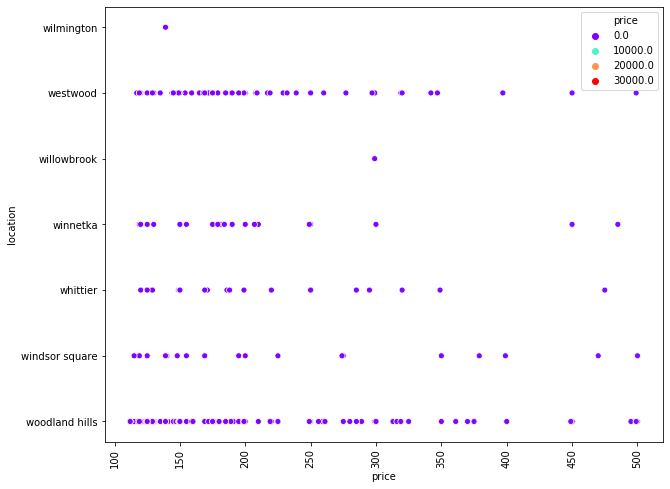

In [92]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.scatterplot(y=df1[df1.priceType=='Mid'].location.sort_values(ascending=False)[:300],\
                x='price',hue='price',palette='rainbow',data=df1)

<Figure size 3600x3240 with 0 Axes>

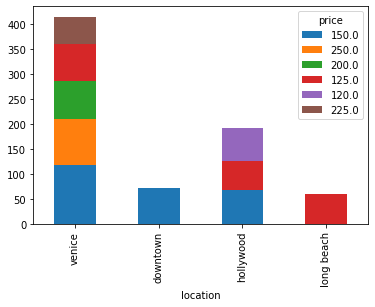

In [106]:
plt.figure(figsize=(50,45))
mid = df1[df1.priceType=='Mid'].groupby(['location'])['price'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True);
plt.show()

<Figure size 3600x3240 with 0 Axes>

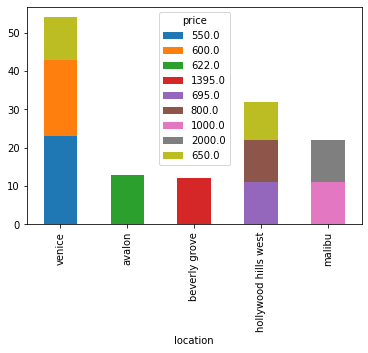

In [107]:
plt.figure(figsize=(50,45))
mid = df1[df1.priceType=='High'].groupby(['location'])['price'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True);
plt.show()

<Figure size 3600x3240 with 0 Axes>

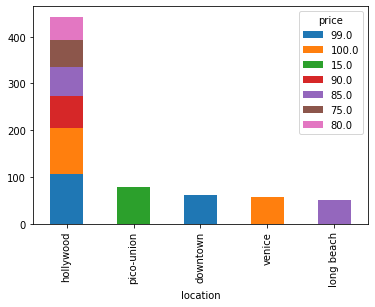

In [129]:
plt.figure(figsize=(50,45))
mid = df1[df1.priceType=='Low'].groupby(['location'])['price'].\
value_counts().nlargest(10).unstack().plot(kind='bar',stacked=True);
plt.show()

In [73]:
import folium
from IPython.display import display
from folium.plugins import FastMarkerCluster


#LDN_COORDINATES = (51.5074, 0.1278)
#m = folium.Map(location=LDN_COORDINATES, zoom_start=12)
#display(m)

In [74]:
m = folium.Map(
    location=[np.mean(df1.latitude), np.mean(df1.longitude)],
    tiles='Cartodb Positron',
    zoom_start=10
)

callback1 = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {icon color: "green", radius:20});'
                'return circle};')

callback2 = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {icon color: "blue", radius:20});'
                'return circle};')

callback3 = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {icon color: "red", radius:20});'
                'return circle};')


m.add_child(FastMarkerCluster(data=list(zip(df1.latitude[df1.priceType=='Low'].values,\
                                            df1.longitude[df1.priceType=='Low'].values)),\
                  callback=callback1))


#m.add_child(FastMarkerCluster(data=list(zip(df1.latitude[df1.priceType =='Mid'].values,\
 #                                           df1.longitude[df1.priceType =='Mid'].values)),\
  #                callback=callback2))

#m.add_child(FastMarkerCluster(data=list(zip(df1.latitude[df1.priceType =='High'].values, \
 #                                           df1.longitude[df1.priceType =='High'].values)),\
  #                callback=callback3))

folium.LayerControl().add_to(m)
display(m)

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup

popup=GeoJsonPopup(fields=['price','location'], aliases=['per night $',"Location"], localize=True, labels=True, style="background-color: yellow;")

tooltip=GeoJsonTooltip(
    fields=["priceType"],
    aliases=["Range:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


g = folium.GeoJson(
    df1,
    style_function=lambda x: {
        "fillColor": colormap(x["properties"]["change"])
        if x["properties"]["change"] is not None
        else "transparent",
        "color": "black",
        "fillOpacity": 0.4,
    },
    tooltip=tooltip,
    popup=popup
).add_to(m)


m
